In [30]:
import matplotlib.pyplot as plt
import numpy as np

class Curve:

  def __init__(self, start=0, stop=1, nbr_points=5432):
    self.start = start
    self.stop = stop
    self.nbr_points = nbr_points
  def __f(self, x):
    return x**5

  # Méthode pour tracer la courbe
  def trace_courbe(self):
    nb_points = self.nbr_points
    x = np.linspace(self.start, self.stop, nb_points)
    y = self.__f(x)
    plt.plot(x, y, color="black")

  # Méthode pour déterminer si un point est au-dessus ou en dessous de la courbe
  def dessus(self, x, y):
    return y >= self.__f(x)

  # Méthode pour générer des points
  def genere_points(self):
    nb_points = self.nbr_points
    x = np.random.uniform(self.start, self.stop, nb_points)
    y = np.random.uniform(0, 1, nb_points)
    au_dessus = [self.dessus(x_i, y_i) for x_i, y_i in zip(x, y)]
    for i in range(nb_points):
      if au_dessus[i]:
        plt.plot(x[i], y[i], "bx")
      else:
        plt.plot(x[i], y[i], "g.")
    #colors = ["b" if point else "g" for point in au_dessus]
    #plt.scatter(x, y, c=colors)

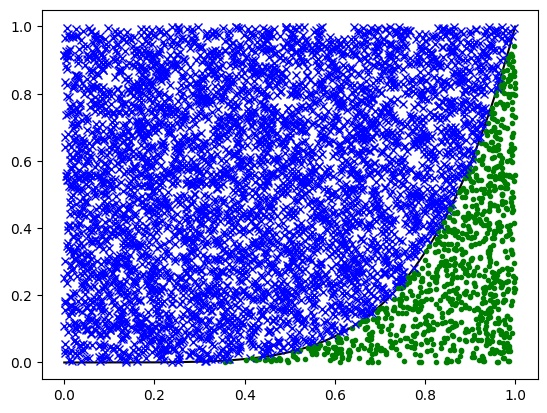

In [31]:
curve= Curve()
curve.trace_courbe()
curve.genere_points()
plt.show()

Mise à jour du code pour le integrer le calcul des différentes surfaces

In [60]:
import matplotlib.pyplot as plt
import numpy as np

class Curve:

  def __init__(self, start=0, stop=1, nbr_points=5432):
    self.start = start
    self.stop = stop
    self.nbr_points = nbr_points
  def __f(self, x):
    return x**5

  # Méthode pour tracer la courbe
  def trace_courbe(self):
    nb_points = self.nbr_points
    x = np.linspace(self.start, self.stop, nb_points)
    y = self.__f(x)
    plt.plot(x, y, color="black")

  # Méthode pour déterminer si un point est au-dessus ou en dessous de la courbe
  def dessus(self, x, y):
    return y >= self.__f(x)

  # Méthode pour générer des points
  def genere_points(self):
    nb_points = self.nbr_points
    x = np.random.uniform(self.start, self.stop, nb_points)
    y = np.random.uniform(0, 1, nb_points)
    au_dessus = [self.dessus(x_i, y_i) for x_i, y_i in zip(x, y)]
    for i in range(nb_points):
      if au_dessus[i]:
        plt.plot(x[i], y[i], "bx")
      else:
        plt.plot(x[i], y[i], "g.")

    # Méthode pour calculer la surface en bleu
  def calcule_surface_bleue(self):
    nb_points = self.nbr_points
    x = np.linspace(self.start, self.stop, nb_points)
    y = self.__f(x)
    surface_bleue = 0
    for i in range(nb_points - 1):
      surface_bleue += (x[i + 1] - x[i]) * (y[i] + y[i + 1]) / 2

    return surface_bleue

  # Méthode pour calculer la surface en vert
  def calcule_surface_verte(self):
    nb_points = self.nbr_points
    x = np.random.uniform(self.start, self.stop, nb_points)
    y = np.random.uniform(0, 1, nb_points)
    au_dessus = [self.dessus(x_i, y_i) for x_i, y_i in zip(x, y)]
    surface_verte = 0

    for i in range(nb_points - 1):
        if au_dessus[i] and au_dessus[i + 1]:
            surface_verte += (x[i + 1] - x[i]) * (y[i] + y[i + 1]) / 2
        elif au_dessus[i] and not au_dessus[i + 1]:
            intersection_x = (self.__f(x[i]) - y[i]) / (y[i + 1] - y[i]) * (x[i + 1] - x[i]) + x[i]
            surface_verte += (intersection_x - x[i]) * (y[i] + self.__f(intersection_x)) / 2
        elif not au_dessus[i] and au_dessus[i + 1]:
            intersection_x = (self.__f(x[i + 1]) - y[i + 1]) / (y[i] - y[i + 1]) * (x[i + 1] - x[i]) + x[i]
            surface_verte += (x[i + 1] - intersection_x) * (y[i + 1] + self.__f(intersection_x)) / 2

    return surface_verte

Surface Bleue: 0.16666668079299007
Surface Verte: -1463474191807135.8


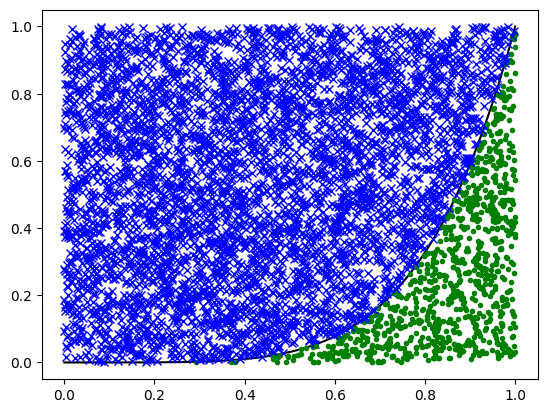

In [61]:
curve_instance = Curve()
curve_instance.trace_courbe()

curve_instance.genere_points()

surface_bleue = curve_instance.calcule_surface_bleue()
surface_verte = curve_instance.calcule_surface_verte()
print("Surface Bleue:", surface_bleue)
print("Surface Verte:", surface_verte)

plt.show()